In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from snippets import (custom_preprocess,
                      custom_tokenize, getTopWordsByCategory, 
                      plotTopWordsByCategory, plotTopWords, 
                      plotClassShares, printSampleComments,
                      plotSetIntersections, calculateUncertanityCoeff,
                      plotUncertanityCoeff)

from bag_of_words import (calculateTFIDFscore, fitModel, NbSvmClassifier, trainBagOfWords)

from config import (APPO)
import pyLDAvis.gensim

In [4]:
# Load data
file = "C:/Users/Magda/Documents/detect-toxic-comments/data/train.csv"
df = pd.read_csv(file)
df = df.iloc[0:1000]

In [5]:
df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [6]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [7]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
UNIQUE_ID = "id"
TOXIC_LABELS = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
CONTENT_LABEL = "comment_text"
df[CONTENT_LABEL].fillna("unknown", inplace=True)

for col in TOXIC_LABELS:
    print("Labels for %s are: %s" % (col, ', '.join(map(str, df[col].unique()))))

Labels for toxic are: 0, 1
Labels for severe_toxic are: 0, 1
Labels for obscene are: 0, 1
Labels for threat are: 0, 1
Labels for insult are: 0, 1
Labels for identity_hate are: 0, 1


In [9]:
INNOCENT_LABEL = "innocent"
df[INNOCENT_LABEL] = (df[TOXIC_LABELS].sum(axis = 1) == 0).astype(int)
LABELS = TOXIC_LABELS + [INNOCENT_LABEL]

In [10]:
# Sample comments
printSampleComments(df, CONTENT_LABEL, TOXIC_LABELS, 3)

TOXIC: 
"

 SR/CL: 

U bud bin A-way. Like long time like time outa mind long.  Gooood shit but mo' latah an dat.  Soon az Ah gitz back heah sum a de brotherz 'n sistahs 
sez ""Hance dead or alive?  We're about to send a Zion Ranger to check on his condition.""  Ah sez ""Whoa! Led me gib him a holler.""  Dis me hollerin Bro. 
De Zion Rangerz be dem dat do most a' de walkin tru wallz.  Not all but most. De wall walkin dude ain gonna do R Bro no harm, he jes be checkin.  
EE-ben so a gentle remindah kum fuhst.  U be readin id. A leedle postin a dis 'n dat go down GOOD.  Doan fohget to cut sum ZZzz aftah a tad a postin. 
Sleep good 'n doan fergit ta dream. Sumptin might kum jes ta BDH all wrapt roun wid delta wave 'n a kupla otha' carrierz what we diz-cuss lAtah. Chow, Bro."

You really are a rebel guy, rebelguys! 

Time to get oral from a  prostitute'''!

FisherQueen, would you kindly stop following my every move and deleting things off MY user page. Havent you got anything better to do 

IndexError: single positional indexer is out-of-bounds

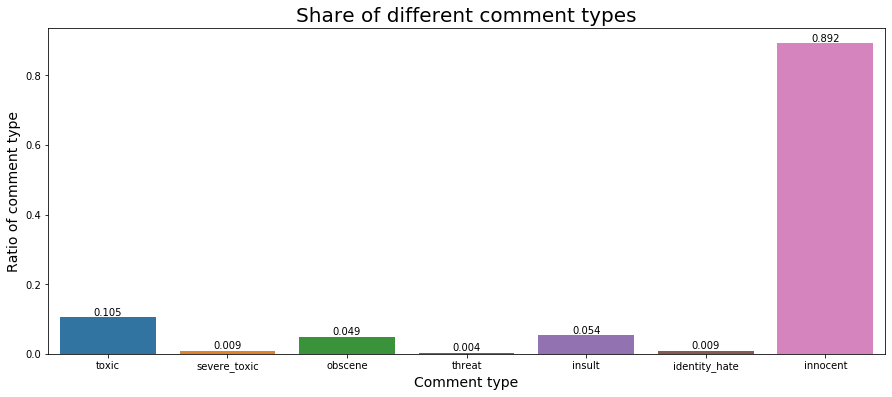

In [11]:
# Analyse share of each label
ratio = df[LABELS].mean()
plotClassShares(LABELS, ratio)

There are 1000 comments, but 1122 comment labels.


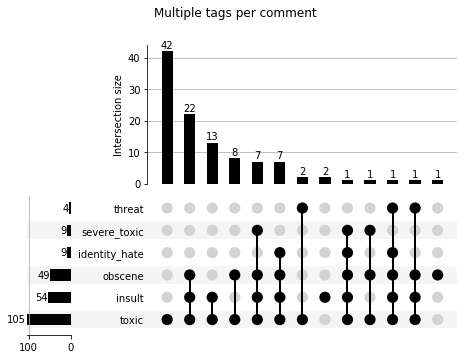

In [12]:
# Multiple labels
print("There are %s comments, but %s comment labels." % (df.shape[0], int(df.shape[0]*ratio.sum())))

df_subset = df.loc[df[INNOCENT_LABEL] == 0]    
plotSetIntersections(df_subset, TOXIC_LABELS, UNIQUE_ID)

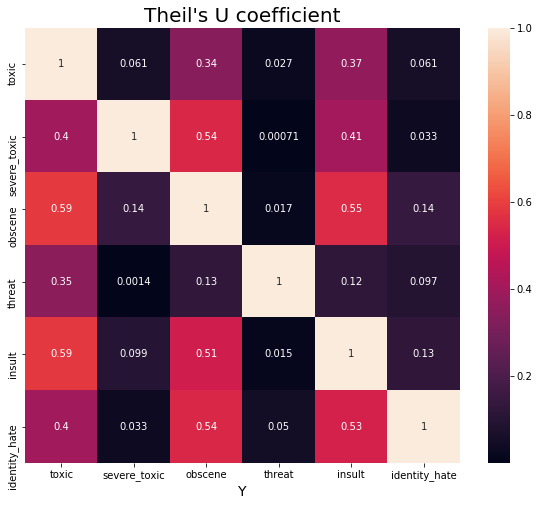

In [13]:
# Theil's U uncertanity coefficient 
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

uncertanity_coeff = calculateUncertanityCoeff(df, TOXIC_LABELS)
plotUncertanityCoeff(uncertanity_coeff, TOXIC_LABELS)

In [14]:
# Calculate TF-IDF (Term Frequency - Inverse Document Frequency) 
word_counts, features = calculateTFIDFscore(df[CONTENT_LABEL])

In [15]:
# Sample features
SHOW_FEATURES = 200 
for feature in features[:SHOW_FEATURES]:
    print(feature)

0px
138amanda
13id
13kb
151wikid
17kb
1800s
1em
1equalvoice1
1px
204over
20mins
21wikipedia_talk
24c
27_noticeboard
28apparently_user
2c29
2c_and_the_music_list
2c_evidence_belowas
2c_is_an_apparent_pov_pusher
2over0
2u
2years
30mins
3am
3axm8_rifle
3daughters
3rr
40s
43sept
4kb
4meter4
60ies
60mins
7pmet
8888aa
8px
9pmet
9years
DIGIT
I
IP
ORDER
SPAM
URL
YEAR
_
_eyal_zisser
_not_
_only_
_sdt
_sdtp
_മ
a1
a2
a7
aa
aat
aba
abandon
abaranger
abbey
abbie
abc
abi
abide
abilities
ability
abkhazia
able
abn
aboriginal
absence
absent
absolute
absolutely
absolutewrite
absoutely
absurd
absurdly
abt
abu
abuse
abused
abusing
abusive
ac
academe
academia
academic
academics
accent
accented
accents
accept
acceptable
acceptance
accepted
accepting
accepts
access
accessible
accesss
accidents
acclaim
accompanied
accord
accordance
according
accordingly
account
accounting
accounts
acctually
accuracy
accurate
accurately
accusation
accusations
accusatory
accuse
accused
accuses
accusing
achievable
achieve
achiev

In [16]:
# Get most common words
NUM_WORDS_CAT = 10
NUM_WORDS_ALL = 20
words, counts = getTopWordsByCategory(df, TOXIC_LABELS, word_counts, features, NUM_WORDS_CAT)
words_all, counts_all = getTopWordsByCategory(df, TOXIC_LABELS, word_counts, features, NUM_WORDS_ALL, aggregate = True)

C:\Users\Magda\Documents\detect-toxic-comments\snippets.py:122: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  rows2take = df[categories[i]].nonzero()[0]


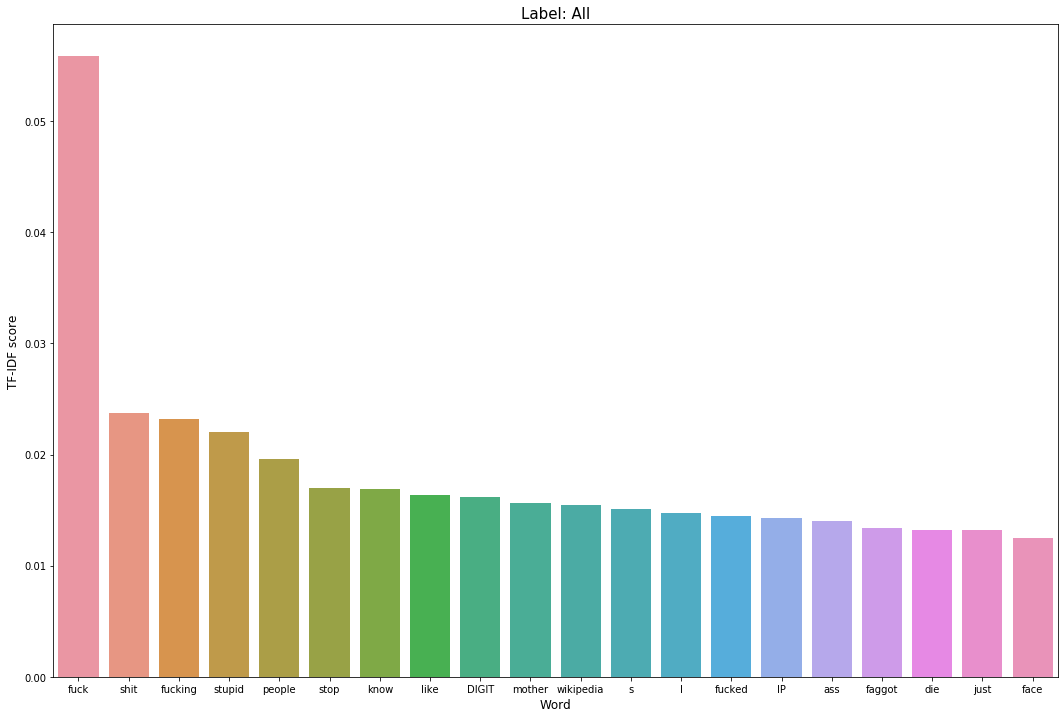

In [17]:
plotTopWords(words_all[0], counts_all[0], "All")

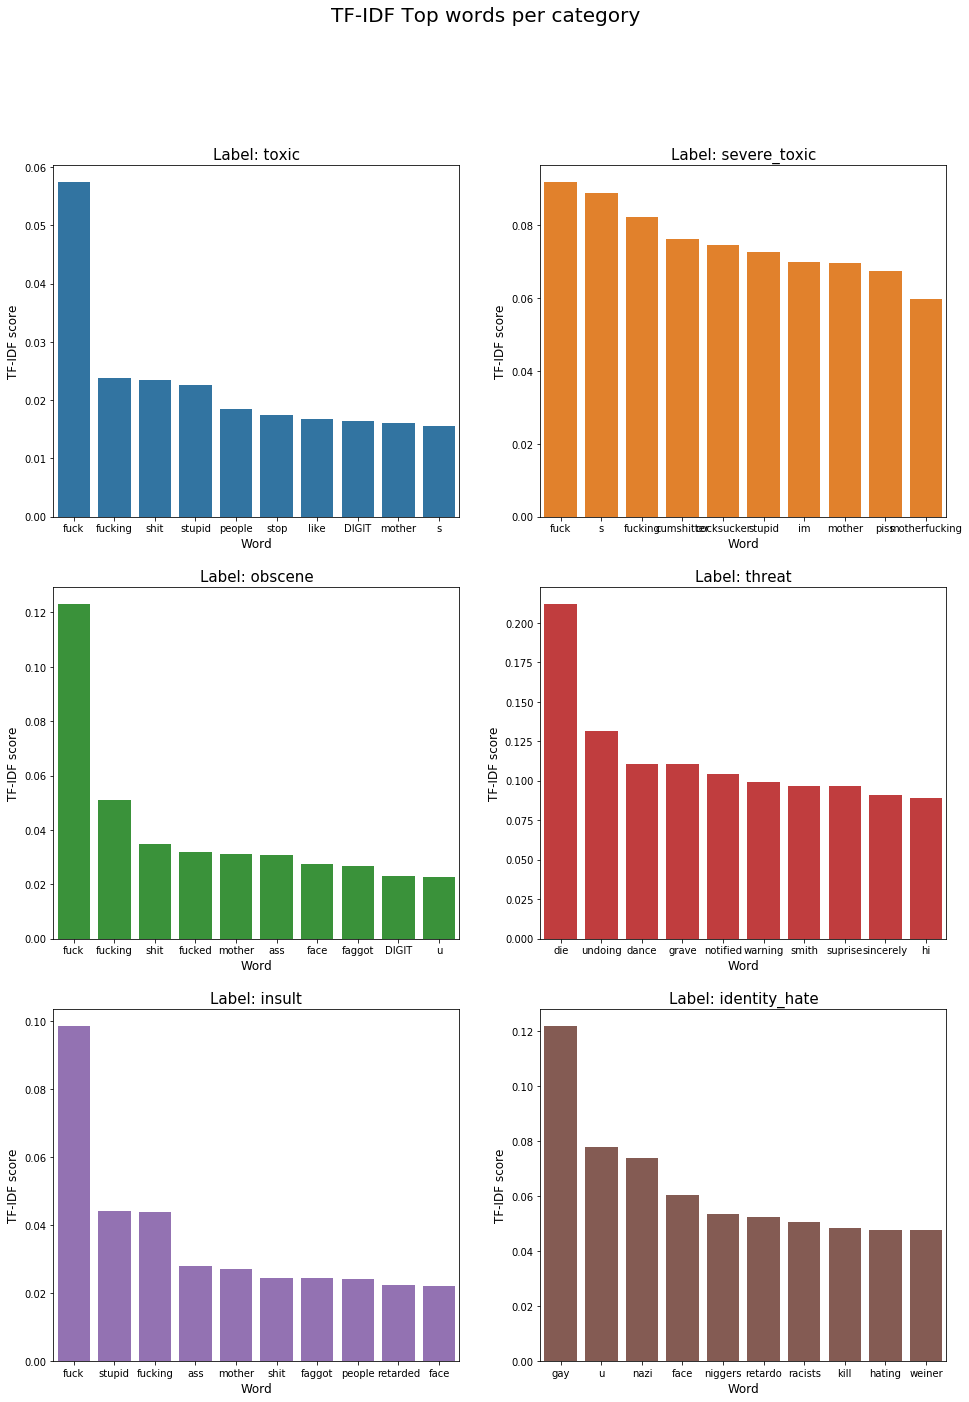

In [18]:
plotTopWordsByCategory(words, counts, TOXIC_LABELS)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(word_counts, df[TOXIC_LABELS], test_size=0.2, random_state=666)
metrics_train, metrics_test, measures = trainBagOfWords(X_train, X_test, y_train, y_test, TOXIC_LABELS)

Class: toxic
Log loss: 0.04145197370289729
Class: severe_toxic
Log loss: 0.0014508768542034736


c:\users\magda\documents\detect-toxic-comments\venv\lib\site-packages\sklearn\metrics\classification.py:1477: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  recall = _prf_divide(tp_sum, true_sum, "recall", "true", average, warn_for)
c:\users\magda\documents\detect-toxic-comments\venv\lib\site-packages\sklearn\metrics\classification.py:1477: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  recall = _prf_divide(tp_sum, true_sum, "recall", "true", average, warn_for)


Class: obscene
Log loss: 0.012224023448117446
Class: threat
Log loss: 0.000683723256009762


c:\users\magda\documents\detect-toxic-comments\venv\lib\site-packages\sklearn\metrics\classification.py:1477: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  recall = _prf_divide(tp_sum, true_sum, "recall", "true", average, warn_for)
c:\users\magda\documents\detect-toxic-comments\venv\lib\site-packages\sklearn\metrics\classification.py:1477: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  recall = _prf_divide(tp_sum, true_sum, "recall", "true", average, warn_for)


Class: insult
Log loss: 0.01607625154339928
Class: identity_hate
Log loss: 0.0021135287847119997


c:\users\magda\documents\detect-toxic-comments\venv\lib\site-packages\sklearn\metrics\classification.py:1477: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  recall = _prf_divide(tp_sum, true_sum, "recall", "true", average, warn_for)
c:\users\magda\documents\detect-toxic-comments\venv\lib\site-packages\sklearn\metrics\classification.py:1477: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  recall = _prf_divide(tp_sum, true_sum, "recall", "true", average, warn_for)


In [ ]:
print("Model performance on training set")
pd.DataFrame(metrics_train, columns = TOXIC_LABELS, index = measures)

In [ ]:
print("Model performance on test set")
pd.DataFrame(metrics_test, columns = TOXIC_LABELS, index = measures)

In [20]:
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

tokenized_text = df[CONTENT_LABEL].apply(lambda x: custom_tokenize(x))

c:\users\magda\documents\detect-toxic-comments\venv\lib\site-packages\scipy\sparse\sparsetools.py:25: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [21]:
dictionary = Dictionary(tokenized_text)

In [22]:
corpus = [dictionary.doc2bow(text) for text in tokenized_text]
ldamodel = LdaModel(corpus=corpus, num_topics=15, id2word=dictionary)

In [23]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

c:\users\magda\documents\detect-toxic-comments\venv\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.051447  0.002086       1        1  34.007206
13    -0.029324 -0.008484       2        1  11.639239
0     -0.020048  0.001685       3        1   9.263218
9     -0.033185  0.006367       4        1   8.881526
3     -0.015842 -0.009994       5        1   7.092894
1     -0.015327 -0.029092       6        1   4.401574
12    -0.006149  0.054507       7        1   4.356936
5     -0.010083 -0.009706       8        1   4.050279
7      0.011127 -0.034254       9        1   3.651999
2      0.000807 -0.012015      10        1   3.060064
4      0.012603  0.029312      11        1   2.646978
14     0.013290  0.018987      12        1   2.455932
6      0.038263 -0.000265      13        1   2.147921
8      0.011904 -0.004526      14        1   1.909263
11     0.093412 -0.004606      15        1   0.434975, topic_info=     Category         Freq     Term        Total  loglift  logprob
36    Default  2702.000000      the  2702.000000  30.0000  30.0000
8     Default  1360.000000        I  1360.000000  29.0000  29.0000
75    Default  1273.000000       of  1273.000000  28.0000  28.0000
85    Default  1713.000000       to  1713.000000  27.0000  27.0000
61    Default  1162.000000      and  1162.000000  26.0000  26.0000
93    Default  1144.000000        a  1144.000000  25.0000  25.0000
70    Default   909.000000       is   909.000000  24.0000  24.0000
1     Default   749.000000    DIGIT   749.000000  23.0000  23.0000
83    Default   885.000000     that   885.000000  22.0000  22.0000
121   Default   698.000000       it   698.000000  21.0000  21.0000
120   Default   795.000000       in   795.000000  20.0000  20.0000
155   Default  1041.000000      you  1041.000000  19.0000  19.0000
112   Default   556.000000      for   556.000000  18.0000  18.0000
79    Default   369.000000        s   369.000000  17.0000  17.0000
55    Default   448.000000     this   448.000000  16.0000  16.0000
101   Default   455.000000       be   455.000000  15.0000  15.0000
74    Default   552.000000      not   552.000000  14.0000  14.0000
33    Default   334.000000        t   334.000000  13.0000  13.0000
25    Default   567.000000       on   567.000000  12.0000  12.0000
450   Default   293.000000     your   293.000000  11.0000  11.0000
116   Default   397.000000     have   397.000000  10.0000  10.0000
98    Default   400.000000      are   400.000000   9.0000   9.0000
484   Default   247.000000      The   247.000000   8.0000   8.0000
165   Default   457.000000       as   457.000000   7.0000   7.0000
48    Default   171.000000     YEAR   171.000000   6.0000   6.0000
215   Default   348.000000      was   348.000000   5.0000   5.0000
26    Default   252.000000     page   252.000000   4.0000   4.0000
182   Default   313.000000  article   313.000000   3.0000   3.0000
56    Default   360.000000     with   360.000000   2.0000   2.0000
72    Default   229.000000       me   229.000000   1.0000   1.0000
...       ...          ...      ...          ...      ...      ...
36    Topic15     4.996886      the  2702.075684  -0.8553  -4.1291
75    Topic15     3.563514       of  1273.604126  -0.4412  -4.4672
61    Topic15     3.165753      and  1162.679932  -0.4685  -4.5855
48    Topic15     1.415565     YEAR   171.255157   0.6420  -5.3904
8     Topic15     2.940345        I  1360.121582  -0.6992  -4.6594
2102  Topic15     0.418263      God     6.352491   2.7171  -6.6096
484   Topic15     1.465666      The   247.471466   0.3087  -5.3556
1574  Topic15     0.512765     dead    11.611118   2.3177  -6.4058
85    Topic15     2.776979       to  1713.106445  -0.9871  -4.7165
93    Topic15     2.386418        a  1144.059082  -0.7349  -4.8681
139   Topic15     1.142078   should   138.964615   0.6363  -5.6051
55    Topic15     1.589437     this   448.783112  -0.2055  -5.2745
70    Topic15     1.804948       is   909.176147  -0.7844  -5.1474
101   Topic15     1.4610

In [ ]:
# TO DO:
# Cleaning + lemmatizing word corpus in data loading
# Separate tokenizing and cleaning that is different for bag of words and for LSTM
# Use same count matrix for NB-SVM and for topic modelling 
# Implement Classification based on topic modelling
# Implement LSTM